# IPL Score Prediction 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data 
df= pd.read_csv('ipl.csv')

In [3]:
# Viewing first 5 rows of our dataset
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df['venue'].value_counts()

M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

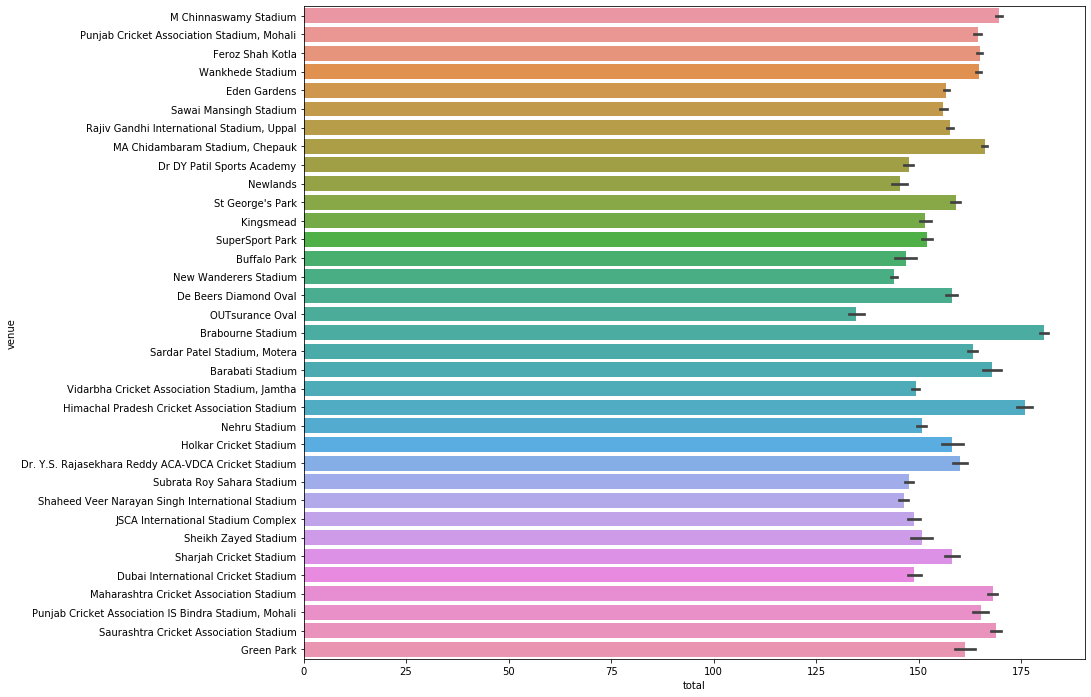

In [5]:
plt.figure(figsize=(14,12))
sns.barplot(x='total',y='venue',data=df)
plt.show()

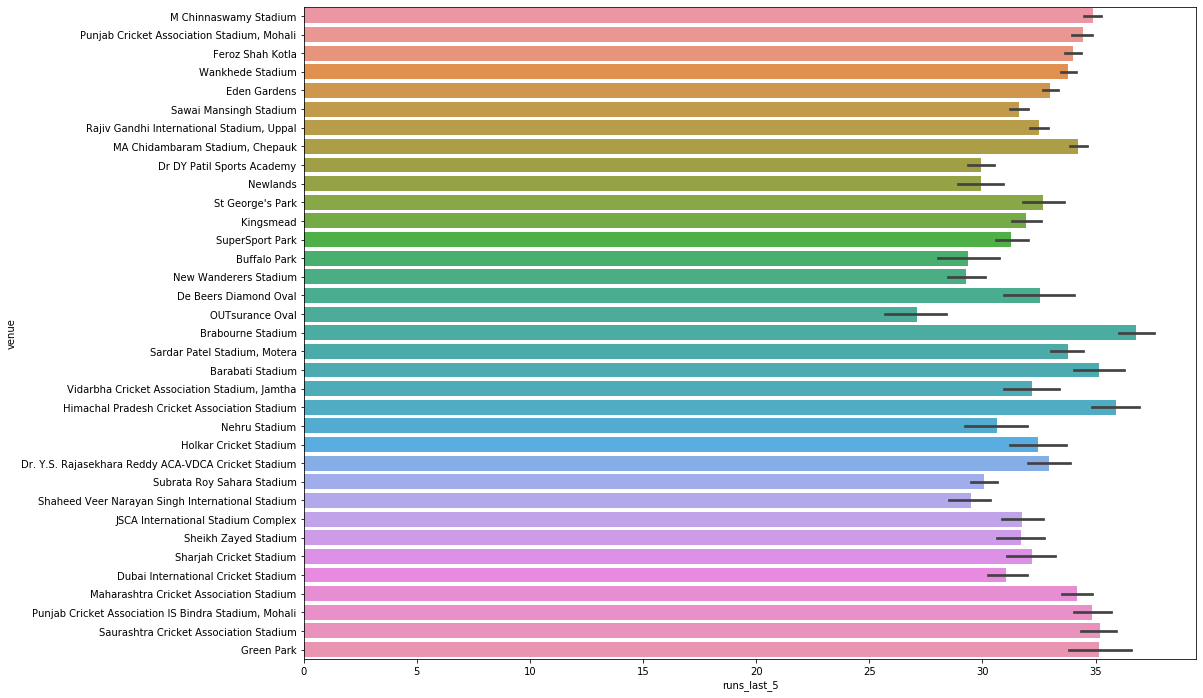

In [6]:
plt.figure(figsize=(16,12))
sns.barplot(x='runs_last_5',y='venue',data=df)

In [7]:
corr=df.corr()

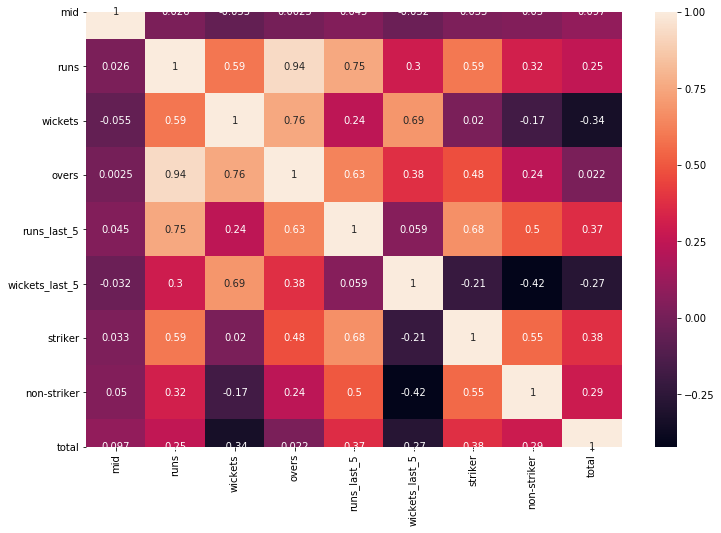

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [9]:
# Dropping Unwanted Columns from the dataset
drop_col=['mid','batsman','bowler','striker','non-striker']
df.drop(labels=drop_col,axis=1,inplace=True)

In [10]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
# list of teams which are currently in IPL
teams=['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders','Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings','Sunrisers Hyderabad']

In [14]:
# Removing teams which are not in IPL in the present time
df= df[(df['bat_team'].isin(teams)) & (df['bowl_team'].isin(teams))]

In [15]:
# Checking teams after removing some teams
df['bat_team'].unique(),df['bowl_team'].unique()

(array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
        'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object),
 array(['Royal Challengers Bangalore', 'Kings XI Punjab',
        'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
        'Chennai Super Kings', 'Kolkata Knight Riders',
        'Sunrisers Hyderabad'], dtype=object))

In [16]:
# Removing data of first 5 overs, because we need data at least of 5 overs for predicting score further  
df=df[df['overs']>=5.0]

In [17]:
df.head(6)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
37,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.6,58,1,222


In [18]:
# Did One hot encoding on batting team and bowling team
encod_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [19]:
encod_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,M Chinnaswamy Stadium,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,M Chinnaswamy Stadium,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,M Chinnaswamy Stadium,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,M Chinnaswamy Stadium,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,M Chinnaswamy Stadium,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [21]:
# Selecting venue which are currently used in IPL
stadium=['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy','Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal', 'Maharashtra Cricket Association Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali']

In [22]:
# Removing Venues in which matches are not played
encod_df=encod_df[(encod_df['venue'].isin(stadium))]

In [23]:
encod_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,M Chinnaswamy Stadium,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,M Chinnaswamy Stadium,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,M Chinnaswamy Stadium,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,M Chinnaswamy Stadium,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,M Chinnaswamy Stadium,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
# Let's do one hot encoding on venues
encoded_df=pd.get_dummies(data=encod_df,columns=['venue'])

In [25]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,"venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Subrata Roy Sahara Stadium,venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,1,0,0,0,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,1,0,0,0,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Dr DY Patil Sports Academy',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadiu

In [27]:
# Renaming the stadium names from venue columns to their respective Location
encoded_df=encoded_df.rename(columns={'venue_M Chinnaswamy Stadium':'Bangalore','venue_Feroz Shah Kotla':'Delhi',
                                      'venue_Eden Gardens':'Kolkata',
                                      'venue_Dr DY Patil Sports Academy':'Mumbai1',
                                      'venue_MA Chidambaram Stadium, Chepauk':'Chennai',
                                      'venue_Maharashtra Cricket Association Stadium':'Mumbai2',
                                      'venue_Punjab Cricket Association IS Bindra Stadium, Mohali':'Mohali1',
                                      'venue_Punjab Cricket Association Stadium, Mohali':'Mohali2',
                                      'venue_Rajiv Gandhi International Stadium, Uppal':'Hyderabad',
                                      'venue_Sawai Mansingh Stadium':'Jaipur',
                                      'venue_Subrata Roy Sahara Stadium':'Mumbai3',
                                      'venue_Wankhede Stadium':'Mumbai4'})

In [28]:
encoded_df.dtypes

date                                      object
runs                                       int64
wickets                                    int64
overs                                    float64
runs_last_5                                int64
wickets_last_5                             int64
total                                      int64
bat_team_Chennai Super Kings               uint8
bat_team_Delhi Daredevils                  uint8
bat_team_Kings XI Punjab                   uint8
bat_team_Kolkata Knight Riders             uint8
bat_team_Mumbai Indians                    uint8
bat_team_Rajasthan Royals                  uint8
bat_team_Royal Challengers Bangalore       uint8
bat_team_Sunrisers Hyderabad               uint8
bowl_team_Chennai Super Kings              uint8
bowl_team_Delhi Daredevils                 uint8
bowl_team_Kings XI Punjab                  uint8
bowl_team_Kolkata Knight Riders            uint8
bowl_team_Mumbai Indians                   uint8
bowl_team_Rajasthan 

In [29]:
# Converting Venue Columns into string type to merge the redundant columns into 1
encoded_df.Mumbai1 = encoded_df.Mumbai1.astype(str)
encoded_df.Mumbai2 = encoded_df.Mumbai2.astype(str)
encoded_df.Mumbai3 = encoded_df.Mumbai3.astype(str)
encoded_df.Mumbai4 = encoded_df.Mumbai4.astype(str)
encoded_df.Mohali1 = encoded_df.Mohali1.astype(str)
encoded_df.Mohali2 = encoded_df.Mohali2.astype(str)

In [30]:
# Merging the redundant columns into a single columns name Mumbai and Mohali
encoded_df['Mumbai']=encoded_df['Mumbai1']+encoded_df['Mumbai2']+encoded_df['Mumbai3']+encoded_df['Mumbai4']
encoded_df['Mohali']=encoded_df['Mohali1']+encoded_df['Mohali2']

In [31]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,Chennai,Mumbai2,Mohali1,Mohali2,Hyderabad,Jaipur,Mumbai3,Mumbai4,Mumbai,Mohali
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,0000,00
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0000,00
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0000,00
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0000,00
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0000,00


In [32]:
# Removing the first three char which got added to the final columns while merging
encoded_df['Mumbai']=encoded_df['Mumbai'].str[3:]

In [33]:
encoded_df.head(20)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,Chennai,Mumbai2,Mohali1,Mohali2,Hyderabad,Jaipur,Mumbai3,Mumbai4,Mumbai,Mohali
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00
37,2008-04-18,61,1,5.6,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00
40,2008-04-18,64,1,6.3,47,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00
41,2008-04-18,66,1,6.4,45,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,00


In [34]:
# Removing the first char which got added to the final column while merging
encoded_df['Mohali']=encoded_df['Mohali'].str[1:]

In [35]:
# Dropping the unwanted Columns
drop_col1=['Mumbai1','Mumbai2','Mumbai3','Mumbai4','Mohali1','Mohali2']
encoded_df.drop(labels=drop_col1,axis=1,inplace=True)

In [36]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,Kolkata,Delhi,Bangalore,Chennai,Hyderabad,Jaipur,Mumbai,Mohali
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [37]:
# Again converting Mumbai and Mohali to int 
encoded_df.Mohali = encoded_df.Mohali.astype(int)
encoded_df.Mumbai = encoded_df.Mumbai.astype(int)

In [38]:
encoded_df.columns


Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'Kolkata', 'Delhi', 'Bangalore',
       'Chennai', 'Hyderabad', 'Jaipur', 'Mumbai', 'Mohali'],
      dtype='object')

In [39]:
# Reaaranging the columns
encoded_df=encoded_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'Kolkata', 'Delhi', 'Bangalore',
       'Chennai', 'Hyderabad', 'Jaipur', 'Mumbai', 'Mohali','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [40]:
encoded_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,Hyderabad,Jaipur,Mumbai,Mohali,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,61,1,5.5,58,1,222


In [41]:
# Converting date column from object type to datetime type
from datetime import datetime
encoded_df['date'] = encoded_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [42]:
# Splitting the data into train and test 
X_train=encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year >= 2017]

In [43]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [44]:
# Dropping the date column as it is not needed further
X_train.drop(labels='date', axis = 1, inplace = True)
X_test.drop(labels='date', axis = 1, inplace = True)

# Model Building

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500,random_state=42) 
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score)) 
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.996
Test set accuracy:  0.607


In [52]:
predictions=rf.predict(X_test)

In [53]:
errors=abs(predictions-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 15.12 degrees.


In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
pred=regressor.predict(X_test)

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7533544196580448

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.6065050440470743

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [61]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.10097e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03238e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9842e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05405e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05072e-1

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [62]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-347.3889631632956


In [63]:
prediction=ridge_regressor.predict(X_test)

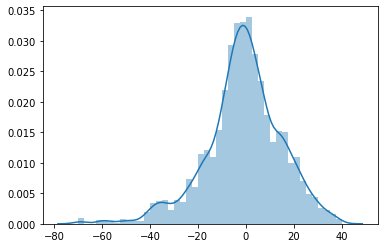

In [64]:
sns.distplot(y_test-prediction)

In [65]:
r2_score(y_test,prediction)

0.7545869335472833

In [76]:
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=1000,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [77]:
y_hat=lin.predict(X_test)

In [78]:
r2_score(y_test,y_hat)

0.6057007626562914

In [79]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.876143652607283
MSE: 254.8537113697782
RMSE: 15.964138290862373


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_hat1=LR.predict(X_test)

In [82]:
r2_score(y_test,y_hat1)

0.5564818306201111

In [87]:
from sklearn.linear_model import ElasticNet
ENreg=ElasticNet(alpha=1,l1_ratio=0.5,normalize=False)
ENreg.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
y_hat2=ENreg.predict(X_test)

In [89]:
mse=np.mean((y_hat2-y_test)**2)

In [90]:
mse

261.9748280271613

In [92]:
ENreg.score(X_test,y_test)

0.7477296071773321

In [94]:
r2_score(y_test,y_hat2)

0.7477296071773321

In [95]:
EN=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
Elastic_regressor=GridSearchCV(EN,parameters,scoring='neg_mean_squared_error',cv=5)
Elastic_regressor.fit(X_train,y_train)

C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3116683.924267171, tolerance: 1809.9212234252136
  positive)
C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3239900.2400341774, tolerance: 1874.6049730004515
  positive)
C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3586131.619892073, tolerance: 2105.8665993176683
  positive)
C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWar

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [97]:
print(Elastic_regressor.best_params_)
print(Elastic_regressor.best_score_)

{'alpha': 1}
-342.5264807674913


In [98]:
y_hat3=Elastic_regressor.predict(X_test)

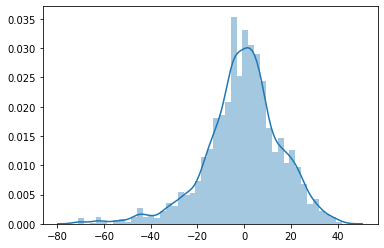

In [99]:
sns.distplot(y_test-y_hat3)

In [100]:
r2_score(y_test,y_hat3)

0.7477296071773321

In [105]:
import pickle
filename = 'ipl_score_pred_model.pkl'
pickle.dump(ridge, open(filename, 'wb'))

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, y_hat3))
print('MSE:', metrics.mean_squared_error(y_test, y_hat3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, )))

MAE: 12.038766752908332
MSE: 261.9748280271613
RMSE: 16.185636472723626
